# Markov Chains

### Imagine that there are two possible states for weather: sunny or cloudy. 
You can always directly observe the current weather state, and it is guaranteed to always be one of the two aforementioned states.Now, you decide you want to be able to predict what the weather will be like tomorrow. Intuitively, you assume that there is an inherent transition in this process, in that the current weather has some bearing on what the next day’s weather will be. So you collect weather data over several years, and calculate that the chance of a sunny day occurring after a cloudy day is 0.25. You also note that, by extension, the chance of a cloudy day occurring after a cloudy day must be 0.75, since there are only two possible states.You can now use this distribution to predict weather for days to come, based on what the current weather state is at the time.


This example illustrates many of the key concepts of a Markov chain.Markov chain is based on a principle of “memorylessness”.In other words the next state of the process only depends on the previous state and not the sequence of states.

A Markov chain essentially consists of a set of transitions, which are determined by some probability distribution, that satisfy the Markov property.

<img src = "img.jpg">

## An example of Markov Chains

Coke and Pepsi are the only companies in country X. A soda company wants to tie up with one of these competitor. They hire a market research company to find which of the brand will have a higher market share after 1 month.

Currently, Pepsi owns 55% and Coke owns 45% of market share. Following are the conclusions drawn out by the market research company:



P(P->P) : Probability of a customer staying with the brand Pepsi over a month = 0.7

P(P->C) : Probability of a customer switching from Pepsi to Coke over a month = 0.3

P(C->C) : Probability of a customer staying with the brand Coke over a month = 0.9

P(C->P) : Probability of a customer switching from Coke to Pepsi over a month = 0.1

The four statements made by the research company can be structured in a simple transition diagram.


<img src = img5.jpg>
The diagram simply shows the transitions and the current market share. Now, if we want to calculate the market share after a month, we need to do following calculations :

Market share (t+1) of Pepsi = Current market Share of Pepsi * P(P->P) + Current market Share of Coke * P(C->P)

Market share (t+1) of Coke = Current market Share of Coke * P(C->C) + Current market Share of Pepsi * P(P->C)

These calculations can be simply done by looking at the following matrix multiplication :

Current State X Transition Matrix = Final State

<img src = img6.jpg>

## The Model

Formally, a Markov chain is a probabilistic automation.
The probability distribution of state transitions is typically represented as the Markov chain’s transition matrix.

If the Markov chain has N possible states, the matrix will be an N x N matrix, such that entry (I, J) is the probability of transitioning from state I to state J.

Additionally, the transition matrix must be a stochastic matrix, a matrix whose entries in each row must add up to exactly 1. This makes complete sense, since each row represents its own probability distribution.

<img src = "img2.jpg">
<img src = "img3.jpg">

#### Additionally, a Markov chain also has an initial state vector, represented as an N x 1 matrix (a vector), that describes the probability distribution of starting at each of the N possible states. Entry I of the vector describes the probability of the chain beginning at state I.

<img src = "img4.jpg">






# Quarterly Sales Forecasting of a product using Markov Chains

#### Below code is based on forecasting using Markov chains in which I am using data as follows:
 Training data :
  Oct'13-Dec'13, Oct'14-Dec'14, Oct'15-Dec'15, Oct'16-Dec'16.
  
  
 Prediction is done for sales from Oct'17-Dec'17

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [11]:
data = pd.read_csv('intermittent data.csv')

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('intermittent data.csv', parse_dates=['date'], index_col='date',date_parser=dateparse)

In [13]:
data.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [14]:
ts = data['sales']

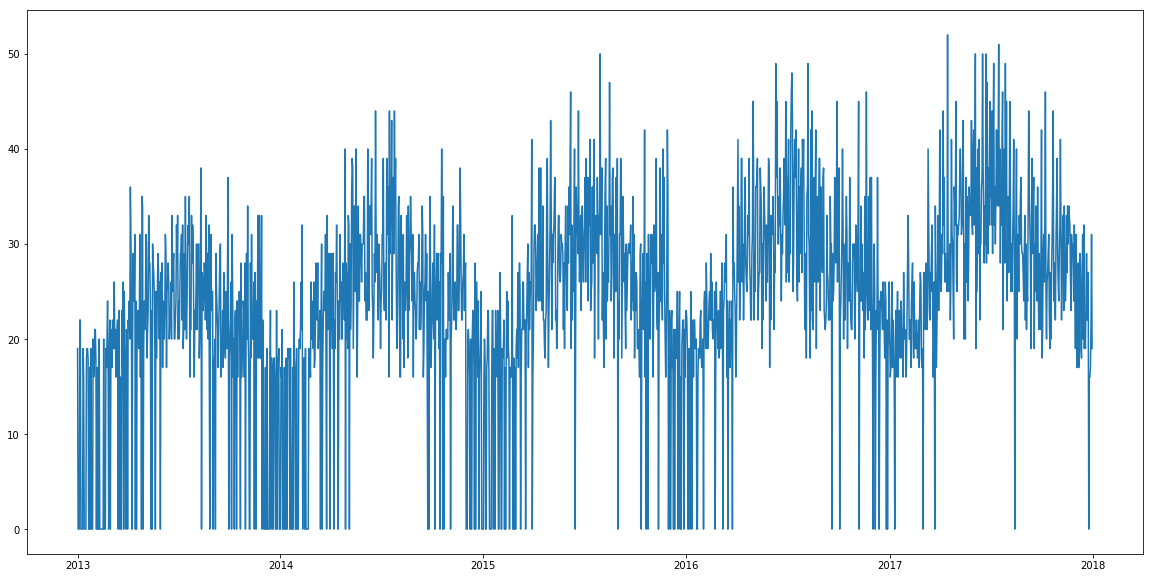

In [15]:
plt.figure(figsize=(20,10))
plt.plot(ts)

## Above TimeSeries clearly depicts the trend and seasonality in the data

In [16]:
test_data = data.loc['2017-10-1':'2017-12-31'].copy()

#### The results obtained for the years '14,'15 and '16 are already stored in arrays, so now I am using '13 as my training data. The code is dynamic in a way as we can use any quarter in the train_data, predict it and save it.

In [17]:
train_data = data.loc['2013-10-1':'2013-12-31'].copy()

In [18]:
train_data.head(10)

,sales
date,
2013-10-01,18
2013-10-02,20
2013-10-03,22
2013-10-04,26
2013-10-05,0
2013-10-06,31
2013-10-07,25
2013-10-08,16
2013-10-09,20


# Modified Markov Chain Model is as follows:

<img src="capture.jpg">

#### The above formula is used for predictions. Lambda(s) mentioned in the formula can be estimated by a Linear Programming model. But most models were giving discrete values of Lambda such that only 1 of them was One and others were Zero.
#### Alternatively, I assigned value of Lambda from the PACF plot which depicts the dependency on previous 7 days.

In [19]:
def plotac_pac(ts):
    import statsmodels.api as sm
    plt.figure(figsize=(20,5))
    sm.graphics.tsa.plot_acf(ts, lags=7)
    plt.show()
    sm.graphics.tsa.plot_pacf(ts,lags=7)
    plt.show() 

<Figure size 1440x360 with 0 Axes>

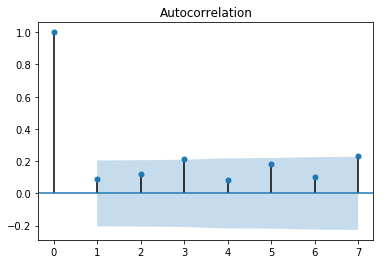

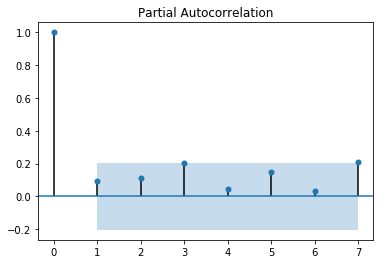

In [20]:
plotac_pac(train_data)

In [21]:
import statsmodels.api as sm

In [22]:
temp = sm.tsa.stattools.pacf(train_data)

In [23]:
temp

array([ 1.00000000e+00,  9.18530352e-02,  1.13738193e-01,  2.03255913e-01,
        4.57560828e-02,  1.46255101e-01,  3.57961742e-02,  2.09623528e-01,
        1.00674330e-01,  9.02195583e-02, -2.53512711e-01,  6.86300613e-02,
       -2.70410228e-02,  2.81209039e-02, -3.21706596e-02, -1.42460119e-01,
        2.29785428e-01, -8.42181644e-02, -7.93018156e-02,  5.37585486e-02,
        2.84013679e-02,  6.25569848e-02,  9.74797548e-02, -1.01289101e-01,
       -1.83843572e-02, -4.21164783e-03,  5.79001790e-03,  9.96891696e-02,
        2.27231185e-04, -3.02443134e-01,  9.75542765e-02, -2.72375893e-01,
       -1.89882775e-01,  1.00234960e-01, -2.44032893e-02,  9.77809506e-02,
        4.91061009e-02, -1.39588802e-01, -2.07813232e-02, -4.80876340e-02,
       -6.30131839e-02])

In [24]:
weights = np.zeros(7)
for i in range(7):
    weights[i] = temp[i+1]

#### So from the PACF plot we can get the weights and these are as follows:

In [25]:
weights

array([0.09185304, 0.11373819, 0.20325591, 0.04575608, 0.1462551 ,
       0.03579617, 0.20962353])

#### Normalizing the weights such that their sum is equal to 1 as required in the Markov chains model:

In [26]:
weights = weights/weights.sum()

In [27]:
weights

array([0.10853766, 0.13439814, 0.24017629, 0.05406744, 0.17282157,
       0.04229836, 0.24770054])

In [28]:
data.shape

(1826, 1)

### Creating 6 different states for sales such as:
#### values ----- states

0----------------0

15 to 22-------1

23 to 27-------2

28 to 32-------3

33 to 37-------4

38 to 47-------5

**minmum value of sales is 15 and if there's no demand then it is 0.

In [29]:
arr = np.zeros(1826)
j=0
for (i,j) in zip (data['sales'],range(1826)):
    if (i>=15 and i<=22):
        arr[j]=1
    elif(i>=23 and i<=27):
        arr[j]=2
    elif(i>=28 and i<=32):
        arr[j]=3
    elif(i>=33 and i<=37):
        arr[j]=4
    elif(i>=38):
        arr[j]=5
arr = arr.astype(int)

In [30]:
unique_elements, counts_elements = np.unique(arr, return_counts=True)

In [31]:
print(unique_elements)

[0 1 2 3 4 5]


In [32]:
print(counts_elements)

[195 547 429 350 179 126]


In [33]:
print(arr)

[1 0 0 ... 1 3 1]


In [34]:
data['sales']=arr

In [35]:
train_data = data.loc['2013-10-1':'2013-12-31'].copy()

In [36]:
unique_elements, counts_elements = np.unique(train_data['sales'], return_counts=True)

In [37]:
unique_elements

array([0, 1, 2, 3, 4])

In [38]:
counts_elements

array([27, 40, 14,  7,  4], dtype=int64)

### Now Defining the State Transition Matrix:

1 State transition probability matrix represents the probability of transition from one state to another without any gap i.e. the probability of states for the next day.

2 State transition probability matrix represents the probability of transition from one state to another with a gap of 1 day i.e. the probability of states for day after tomorrow.


..

..

and so on

In [39]:
def state_transition_matrix(transitions,state):
    n=6
    M = [[0]*n for _ in range(n)]
    for (i,j) in zip(transitions,transitions[state:]):
        M[i][j] += 1

    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

#### 1 state transition probability matrix

In [40]:
q1 = state_transition_matrix(train_data['sales'],1)
for row in q1: print(' '.join('{0:.2f}'.format(x) for x in row))

0.38 0.35 0.15 0.12 0.00 0.00
0.28 0.38 0.17 0.10 0.07 0.00
0.29 0.64 0.07 0.00 0.00 0.00
0.14 0.57 0.14 0.00 0.14 0.00
0.25 0.50 0.25 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00


#### 2 state transition probability matrix

In [41]:
q2 = state_transition_matrix(train_data['sales'],2)
for row in q2: print(' '.join('{0:.2f}'.format(x) for x in row))

0.24 0.52 0.16 0.08 0.00 0.00
0.45 0.30 0.17 0.03 0.05 0.00
0.21 0.36 0.21 0.21 0.00 0.00
0.00 0.71 0.00 0.14 0.14 0.00
0.00 0.75 0.00 0.00 0.25 0.00
0.00 0.00 0.00 0.00 0.00 0.00


#### 3 state transition probability matrix

In [42]:
q3 = state_transition_matrix(train_data['sales'],3)
for row in q3: print(' '.join('{0:.2f}'.format(x) for x in row))

0.40 0.44 0.08 0.08 0.00 0.00
0.36 0.36 0.21 0.05 0.03 0.00
0.14 0.36 0.21 0.14 0.14 0.00
0.00 0.71 0.00 0.14 0.14 0.00
0.25 0.50 0.25 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00


#### 4 state transition probability matrix

In [43]:
q4 = state_transition_matrix(train_data['sales'],4)
for row in q4: print(' '.join('{0:.2f}'.format(x) for x in row))

0.40 0.40 0.08 0.04 0.08 0.00
0.24 0.39 0.18 0.16 0.03 0.00
0.36 0.57 0.07 0.00 0.00 0.00
0.14 0.43 0.43 0.00 0.00 0.00
0.50 0.25 0.00 0.00 0.25 0.00
0.00 0.00 0.00 0.00 0.00 0.00


#### 5 state transition probability matrix

In [44]:
q5 = state_transition_matrix(train_data['sales'],5)
for row in q5: print(' '.join('{0:.2f}'.format(x) for x in row))

0.40 0.44 0.16 0.00 0.00 0.00
0.27 0.46 0.14 0.08 0.05 0.00
0.14 0.36 0.21 0.21 0.07 0.00
0.29 0.43 0.14 0.00 0.14 0.00
0.50 0.25 0.00 0.25 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00


#### 6 state transition probability matrix

In [45]:
q6 = state_transition_matrix(train_data['sales'],6)
for row in q6: print(' '.join('{0:.2f}'.format(x) for x in row))

0.29 0.54 0.08 0.04 0.04 0.00
0.38 0.30 0.19 0.11 0.03 0.00
0.21 0.57 0.07 0.07 0.07 0.00
0.14 0.43 0.43 0.00 0.00 0.00
0.25 0.50 0.00 0.00 0.25 0.00
0.00 0.00 0.00 0.00 0.00 0.00


#### 7 state transition probability matrix

In [46]:
q7 = state_transition_matrix(train_data['sales'],7)
for row in q7: print(' '.join('{0:.2f}'.format(x) for x in row))

0.46 0.25 0.25 0.00 0.04 0.00
0.30 0.54 0.11 0.03 0.03 0.00
0.15 0.46 0.15 0.15 0.08 0.00
0.14 0.43 0.00 0.29 0.14 0.00
0.25 0.50 0.00 0.25 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00


In [47]:
lastweek = data['sales'].loc['2017-09-30':'2017-10-06'].as_matrix()   

C:\Users\amansahotra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [48]:
lastweek

array([3, 5, 1, 1, 3, 3, 2])

In [49]:
hidden_data = data.loc['2017-10-7':'2017-12-31'].copy()

#### Using Lambdas ( weights) and the previous sales of 7 days, the prediction is done for the 8th day. Once we get that  we remove the 1st day and add the correct 8th day (now the last week is from day-2 to day-8) to predict the 9th day and so on. Hence a "Window" is maintained containing the last week to predict the next day.

In [50]:
predicted_state  = np.zeros(85)
for i in range (85):
    lastweek = np.delete(lastweek,0)
    lastweek = np.append(lastweek,[hidden_data['sales'][i]])
    states = np.zeros((7,6))
    x1 = []
    x2 = []
    x3 = []
    x4 = []
    x5 = []
    x6 = []
    x7 = []
    for j in range(7):
        states[j][lastweek[j]]=1
        
    x1 = states[0]
    x1 = np.reshape(x1,(6,1))
    x2 = states[1]
    x2 = np.reshape(x2,(6,1))
    x3 = states[2]
    x3 = np.reshape(x3,(6,1))
    x4 = states[3]
    x4 = np.reshape(x4,(6,1))
    x5 = states[4]
    x5 = np.reshape(x5,(6,1))
    x6 = states[5]
    x6 = np.reshape(x6,(6,1))
    x7 = states[6]
    x7 = np.reshape(x7,(6,1))
    nextstate = []
    #nextstate = weights[0]*np.matmul(q1,x7)+weights[1]*np.matmul(q2,x6)+weights[2]*np.matmul(q3,x5)+weights[3]*np.matmul(q4,x4)+weights[4]*np.matmul(q5,x3)+weights[5]*np.matmul(q6,x2)+weights[6]*np.matmul(q7,x1)
    nextstate = 0*np.matmul(q1,x7)+weights[1]*np.matmul(q2,x6)+0*np.matmul(q3,x5)+0*np.matmul(q4,x4)+0*np.matmul(q5,x3)+weights[5]*np.matmul(q6,x2)+0*np.matmul(q7,x1)
    # 0 in the above formula can be replaced by the significant weights which are above the prediction interval in the PACF plot.
    max1 = np.amax(nextstate)
    maxindex = np.argmax(nextstate)
    predicted_state[i] =  maxindex
    

In [51]:
predicted_state = predicted_state.astype(int)
for i in range(85):
    if(predicted_state[i]==0):
        predicted_state[i] = 0
    elif(predicted_state[i]==1):
        predicted_state[i]=19
    elif(predicted_state[i]==2):
        predicted_state[i]=25
    elif(predicted_state[i]==3):
        predicted_state[i]=30
    elif(predicted_state[i]==4):
        predicted_state[i]=35
    elif(predicted_state[i]==5):
        predicted_state[i]=43
print(predicted_state)

[25 25 19 25 30 25 25 30 25 25 30 25 35 25 25 30 25 25 25 25 35 30 35 30
 25 25 25 25 25 30 30 35 25 25 35 25 30 25 25 25 35 25 30 30 35 30 25 25
 25 25 25 30 25 25 25 25 30 30 25 30 35 25 30 25 25 25 35 30 25 25 35 25
 30 35 35 25 25 35 25 25 19 35 30 30 35]


In [52]:
test_data = test_data['sales'].loc['2017-10-08':'2017-12-31'].as_matrix()

C:\Users\amansahotra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [53]:
test_data

array([46, 25, 20, 26, 27, 29, 31, 23, 19, 27, 20, 27, 30, 36, 44, 24, 28,
       23, 22, 30, 34, 39, 29, 26, 24, 29, 32, 41, 32, 22, 27, 31, 33, 23,
       34, 27, 24, 26, 33, 27, 34, 30, 34, 33, 32, 27, 23, 31, 29, 30, 27,
       24, 32, 27, 19, 31, 26, 17, 21, 28, 17, 26, 29, 28, 19, 18, 26, 31,
       20, 32, 19, 21, 19, 24, 29, 22, 27, 27,  0, 16, 16, 17, 21, 31, 19],
      dtype=int64)

In [54]:
predicted_state

array([25, 25, 19, 25, 30, 25, 25, 30, 25, 25, 30, 25, 35, 25, 25, 30, 25,
       25, 25, 25, 35, 30, 35, 30, 25, 25, 25, 25, 25, 30, 30, 35, 25, 25,
       35, 25, 30, 25, 25, 25, 35, 25, 30, 30, 35, 30, 25, 25, 25, 25, 25,
       30, 25, 25, 25, 25, 30, 30, 25, 30, 35, 25, 30, 25, 25, 25, 35, 30,
       25, 25, 35, 25, 30, 35, 35, 25, 25, 35, 25, 25, 19, 35, 30, 30, 35])

In [55]:
prediction_2016 =np.array([30,  0,  0, 35, 35, 25, 35, 30, 25,  0, 25, 25, 35, 35, 25,  0, 25,
        0, 25, 35, 43, 30, 25, 35, 25,  0, 35, 43, 30, 35, 25, 25, 35, 35,
       30, 35,  0, 25, 35, 43, 25, 43, 25, 25, 25, 43, 25, 43, 35, 43, 43,
       35, 25, 25, 35, 35, 35, 25, 25, 35, 25,  0, 35, 25,  0,  0, 35,  0,
       25, 35, 35,  0,  0, 25, 35,  0, 35,  0,  0,  0, 25, 35,  0, 25,25])

In [56]:
prediction_2015 = np.array([30,  0,  0, 30, 30, 35, 30, 30, 35,  0, 35, 35, 30, 30, 35,  0, 35,
        0, 35, 30, 35, 30, 35, 30, 35,  0, 30, 35, 30, 30, 35, 35, 30, 30,
       30, 30,  0, 35, 30, 35, 35, 35, 35, 35, 35, 35, 35, 35, 30, 35, 35,
       30, 35, 35, 30, 30, 30, 35, 35, 30, 35,  0, 30, 35,  0,  0, 30,  0,
       35, 30, 30,  0,  0, 35, 30,  0, 30,  0,  0,  0, 35, 30,  0, 35, 35])

In [57]:
prediction_2014 = np.array([43, 25, 35, 43, 35, 43, 43, 25, 25, 43, 35, 43, 35, 43, 25, 30, 35,
       43, 19, 43, 35, 25, 35, 30, 25, 43, 43, 25, 19, 30, 25, 35, 43, 25,
       35, 43, 30, 43, 43, 43, 30, 43, 30, 25, 30, 30, 25, 43, 43, 25, 19,
       25, 43, 43, 19, 43, 35, 25, 43, 35, 35, 19, 35, 43, 25, 19, 35, 35,
       43, 19, 35, 25, 35, 35, 35, 43, 25, 35, 43, 43, 43, 35, 35, 35, 35])

In [58]:
average_pred = np.zeros(85)
for i in range (85):
    average_pred[i] = (0.25*prediction_2016[i]+0.25*prediction_2015[i]+0.25*prediction_2014[i]+0.25*predicted_state[i])

In [59]:
average_pred

array([32.  , 12.5 , 13.5 , 33.25, 32.5 , 32.  , 33.25, 28.75, 27.5 ,
       17.  , 31.25, 32.  , 33.75, 33.25, 27.5 , 15.  , 30.  , 17.  ,
       26.  , 33.25, 37.  , 28.75, 32.5 , 31.25, 27.5 , 17.  , 33.25,
       32.  , 26.  , 31.25, 28.75, 32.5 , 33.25, 28.75, 32.5 , 33.25,
       15.  , 32.  , 33.25, 36.5 , 31.25, 36.5 , 30.  , 28.75, 31.25,
       34.5 , 27.5 , 36.5 , 33.25, 32.  , 30.5 , 30.  , 32.  , 32.  ,
       27.25, 33.25, 32.5 , 28.75, 32.  , 32.5 , 32.5 , 11.  , 32.5 ,
       32.  , 12.5 , 11.  , 33.75, 16.25, 32.  , 27.25, 33.75, 12.5 ,
       16.25, 32.5 , 33.75, 17.  , 28.75, 17.5 , 17.  , 17.  , 30.5 ,
       33.75, 16.25, 31.25, 32.5 ])

In [60]:
 mean_absolute_error( np.array(test_data),np.array(average_pred))

NameError: name 'mean_absolute_error' is not defined

In [62]:
np.sum(test_data-average_pred)/85

-1.5029411764705882

In [63]:
for i in range(85):
    average_pred[i]+=(-1.502)

In [65]:
from sklearn.metrics import mean_absolute_error

In [66]:
 mean_absolute_error( np.array(test_data),np.array(average_pred))

6.1967058823529415

Text(0, 0.5, 'sales')

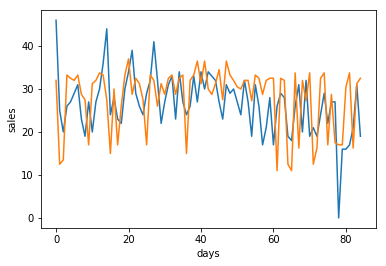

In [361]:
fig, ax = plt.subplots()
ax.plot(test_data)
ax.plot(average_pred)
plt.xlabel('days')
plt.ylabel('sales')

# Thank You !!!